# K-MEANS

## Prestamos bancarios

In [2]:
import pandas as pd
import numpy as np
import random as rd

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

Importando Dataset

In [3]:
df_loans = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/k-means-prestamos.csv")
df_loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


Conociendo los datos del dataset

In [4]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


### Normalizar datos categoricos

Convertir con ***Label encoder***

In [5]:
df_loans['Loan_ID']= df_loans['Loan_ID'].astype('str')
df_loans['Gender']= df_loans['Gender'].astype('str')
df_loans['Self_Employed']= df_loans['Self_Employed'].astype('str')
df_loans['Dependents']= df_loans['Dependents'].astype('str')
df_loans['Property_Area']= df_loans['Property_Area'].astype('str')

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_loans['Loan_Status'] = le.fit_transform(df_loans['Loan_Status'])
#No=0 Yes=1
df_loans['Gender'] = le.fit_transform(df_loans['Gender'])
#Female=0 Male=1
df_loans['Married'] = le.fit_transform(df_loans['Married'])
#Married_yes=1 Married_not=0
df_loans['Education'] = le.fit_transform(df_loans['Education'])
#Graduate=0 NotGraduate=1
df_loans['Self_Employed'] = le.fit_transform(df_loans['Self_Employed'])
#Yes=1 No=0
df_loans['Dependents'] = le.fit_transform(df_loans['Dependents'])
#'0'=0 '1'=1 '2'=2 '3+'=3 'N/A'=4
df_loans['Property_Area'] = le.fit_transform(df_loans['Property_Area'])
#Semiurban=1 Urban=2 Rural=0

#df_loans['Dependents'].value_counts()
df_loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [6]:
df_loans['Loan_Amount_Term'].value_counts()

360.0    312
180.0     29
480.0     11
300.0      7
84.0       3
120.0      3
240.0      2
36.0       1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [7]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             381 non-null    int64  
 2   Married            381 non-null    int64  
 3   Dependents         381 non-null    int64  
 4   Education          381 non-null    int64  
 5   Self_Employed      381 non-null    int64  
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    int64  
 12  Loan_Status        381 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 38.8+ KB


### Llenar datos nulos o vacios

Comprobando datos nulos

In [8]:
df_loans.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

Rayos :( Tocara llenarlos

Imputacion de Credit_History

In [9]:
mean = df_loans['Credit_History'].mean()
df_loans['Credit_History'] = df_loans['Credit_History'].fillna(mean)

Imputacion de Loan_Amount_Term

In [10]:
mean = df_loans['Loan_Amount_Term'].mean()
df_loans['Loan_Amount_Term'] = df_loans['Loan_Amount_Term'].fillna(mean)

Conversion de float a entero

In [13]:
df_loans['CoapplicantIncome']= df_loans['CoapplicantIncome'].astype('int')
df_loans['LoanAmount']= df_loans['LoanAmount'].astype('int')
df_loans['Loan_Amount_Term']= df_loans['Loan_Amount_Term'].astype('int')
df_loans['Credit_History']= df_loans['Credit_History'].astype('int')

In [14]:
df_loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508,128,360,1,0,0
1,LP001005,1,1,0,0,1,3000,0,66,360,1,2,1
2,LP001006,1,1,0,1,0,2583,2358,120,360,1,2,1
3,LP001008,1,0,0,0,0,6000,0,141,360,1,2,1
4,LP001013,1,1,0,1,0,2333,1516,95,360,1,2,1


In [15]:
df_loans.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [16]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            381 non-null    object
 1   Gender             381 non-null    int64 
 2   Married            381 non-null    int64 
 3   Dependents         381 non-null    int64 
 4   Education          381 non-null    int64 
 5   Self_Employed      381 non-null    int64 
 6   ApplicantIncome    381 non-null    int64 
 7   CoapplicantIncome  381 non-null    int64 
 8   LoanAmount         381 non-null    int64 
 9   Loan_Amount_Term   381 non-null    int64 
 10  Credit_History     381 non-null    int64 
 11  Property_Area      381 non-null    int64 
 12  Loan_Status        381 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 38.8+ KB


In [17]:
df_loans['Education'].value_counts()

0    278
1    103
Name: Education, dtype: int64

Graficar los datos en una matriz de correlacion

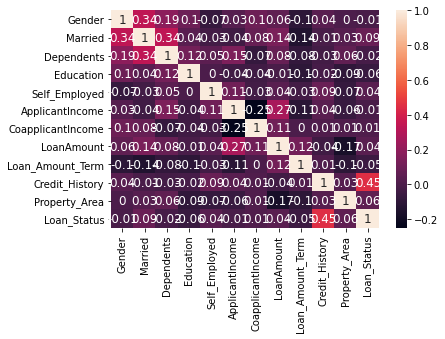

In [18]:
correlation_matrix = df_loans.corr().round(2)
sb.heatmap(correlation_matrix, annot=True, annot_kws={'size': 12})

### Aplicando K-Means

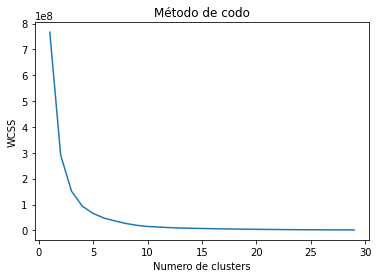

In [21]:
X = df_loans[["LoanAmount","ApplicantIncome"]]
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 30), wcss)
plt.title('Método de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

Hallando los centroides

In [22]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)

print(centroids)
print(labels)

[[  96.11304348 2186.71304348]
 [ 119.40625    5784.3125    ]
 [ 103.88732394 3312.11971831]
 [ 119.66666667 7712.13333333]
 [ 111.41558442 4433.09090909]]
[4 2 0 1 0 2 0 0 0 4 2 2 4 0 3 0 2 2 4 0 2 2 4 2 0 2 2 2 0 0 4 4 2 1 1 0 4
 0 2 4 4 0 0 2 2 0 2 4 2 3 4 0 2 4 2 0 2 2 4 0 2 0 2 2 4 2 0 0 4 0 4 2 3 0
 1 2 4 0 4 0 2 2 0 0 2 4 4 2 4 0 0 0 4 1 0 2 2 0 2 3 4 0 0 0 2 4 2 0 2 0 0
 4 2 0 0 4 2 4 0 2 0 2 4 4 2 4 0 2 2 1 2 2 0 2 4 4 0 4 2 1 4 0 2 2 2 2 2 2
 1 0 1 2 1 3 1 2 0 2 0 1 1 4 0 3 1 4 2 2 2 2 0 4 2 2 4 4 0 0 2 0 2 4 2 4 2
 1 4 4 0 0 2 4 0 4 2 0 2 2 0 1 2 2 0 2 0 4 2 4 4 0 4 2 2 1 4 0 2 0 2 0 1 0
 2 4 2 4 4 2 3 1 0 1 2 2 4 3 4 2 1 2 3 4 2 0 0 1 0 0 2 2 2 2 4 0 2 2 0 0 4
 0 0 2 0 2 0 2 1 0 0 3 0 4 1 2 0 3 1 0 2 0 3 4 2 4 2 2 0 0 4 0 3 2 4 4 3 1
 4 1 2 0 4 0 4 0 2 2 0 0 2 0 0 2 2 2 0 4 2 0 2 4 2 2 2 2 0 2 0 2 2 0 0 1 2
 0 3 4 2 0 2 2 4 0 2 0 2 2 0 4 2 2 1 0 2 1 4 2 2 0 2 1 2 2 2 0 0 2 0 2 0 0
 4 0 2 2 2 2 1 2 2 4 4]


In [23]:
colores=['blue','red','green','yellow','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
print(centroids[:, 0])

[ 96.11304348 119.40625    103.88732394 119.66666667 111.41558442]


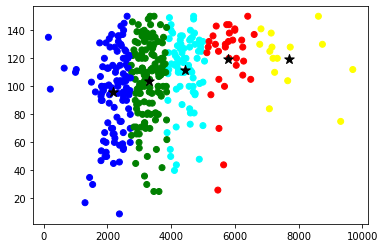

In [25]:
f1 = df_loans['ApplicantIncome'].values
f2 = df_loans['LoanAmount'].values
 
plt.scatter(f1, f2, c=asignar)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', c='black', s=100)
plt.show()

In [26]:
df_cluster = pd.DataFrame()

df_cluster['data_index'] = df_loans.index.values
df_cluster['data_index'] = df_loans.Education
df_cluster['cluster'] = kmeans.labels_
df_cluster.head()

,data_index,cluster
0,0,4
1,0,2
2,1,0
3,0,1
4,1,0


In [27]:
df_cluster[df_cluster.cluster == 4]

,data_index,cluster
0,0,4
9,0,4
12,1,4
18,1,4
22,0,4
...,...,...
347,0,4
354,1,4
370,0,4
379,0,4
